In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/Users/yashpatawari/LLM_VLM_Comparison/Evaluation Datasheet - Individual Score.csv')
df.head()

,Method,ChatGPT,Gemini,c4 AI Command R+
0,LLM-Zero Shot,8.3,8.1,8.2
1,LLM-One Shot,8.2,8.1,8.4
2,LLM-Two Shot,8.6,8.2,8.8
3,LLM-Four Shot,9.0,8.2,9.0
4,LLM-RAG,8.4,9.0,9.0


In [7]:
methods = df['Method']
print(methods)

methods_list = methods.tolist()
print(type(methods_list))



0             LLM-Zero Shot
1              LLM-One Shot
2              LLM-Two Shot
3             LLM-Four Shot
4                   LLM-RAG
5             LLM-Fine Tune
6    VLM-No Object Detector
7             VLM-Zero Shot
8              VLM-One Shot
9             VLM-Fine Tune
Name: Method, dtype: object
<class 'list'>


In [29]:
gpt = df['ChatGPT'].tolist()
gemini = df['Gemini'].tolist()
c4 = df['c4 AI Command R+'].tolist()

print(gpt)
print(gemini)
print(c4)

[8.3, 8.2, 8.6, 9.0, 8.4, 8.4, 5.6, 8.2, 8.0, 8.0]
[8.1, 8.1, 8.2, 8.2, 9.0, 8.4, 3.8, 7.6, 7.6, 8.8]
[8.2, 8.4, 8.8, 9.0, 9.0, 9.0, 7.4, 8.3, 8.9, 8.8]


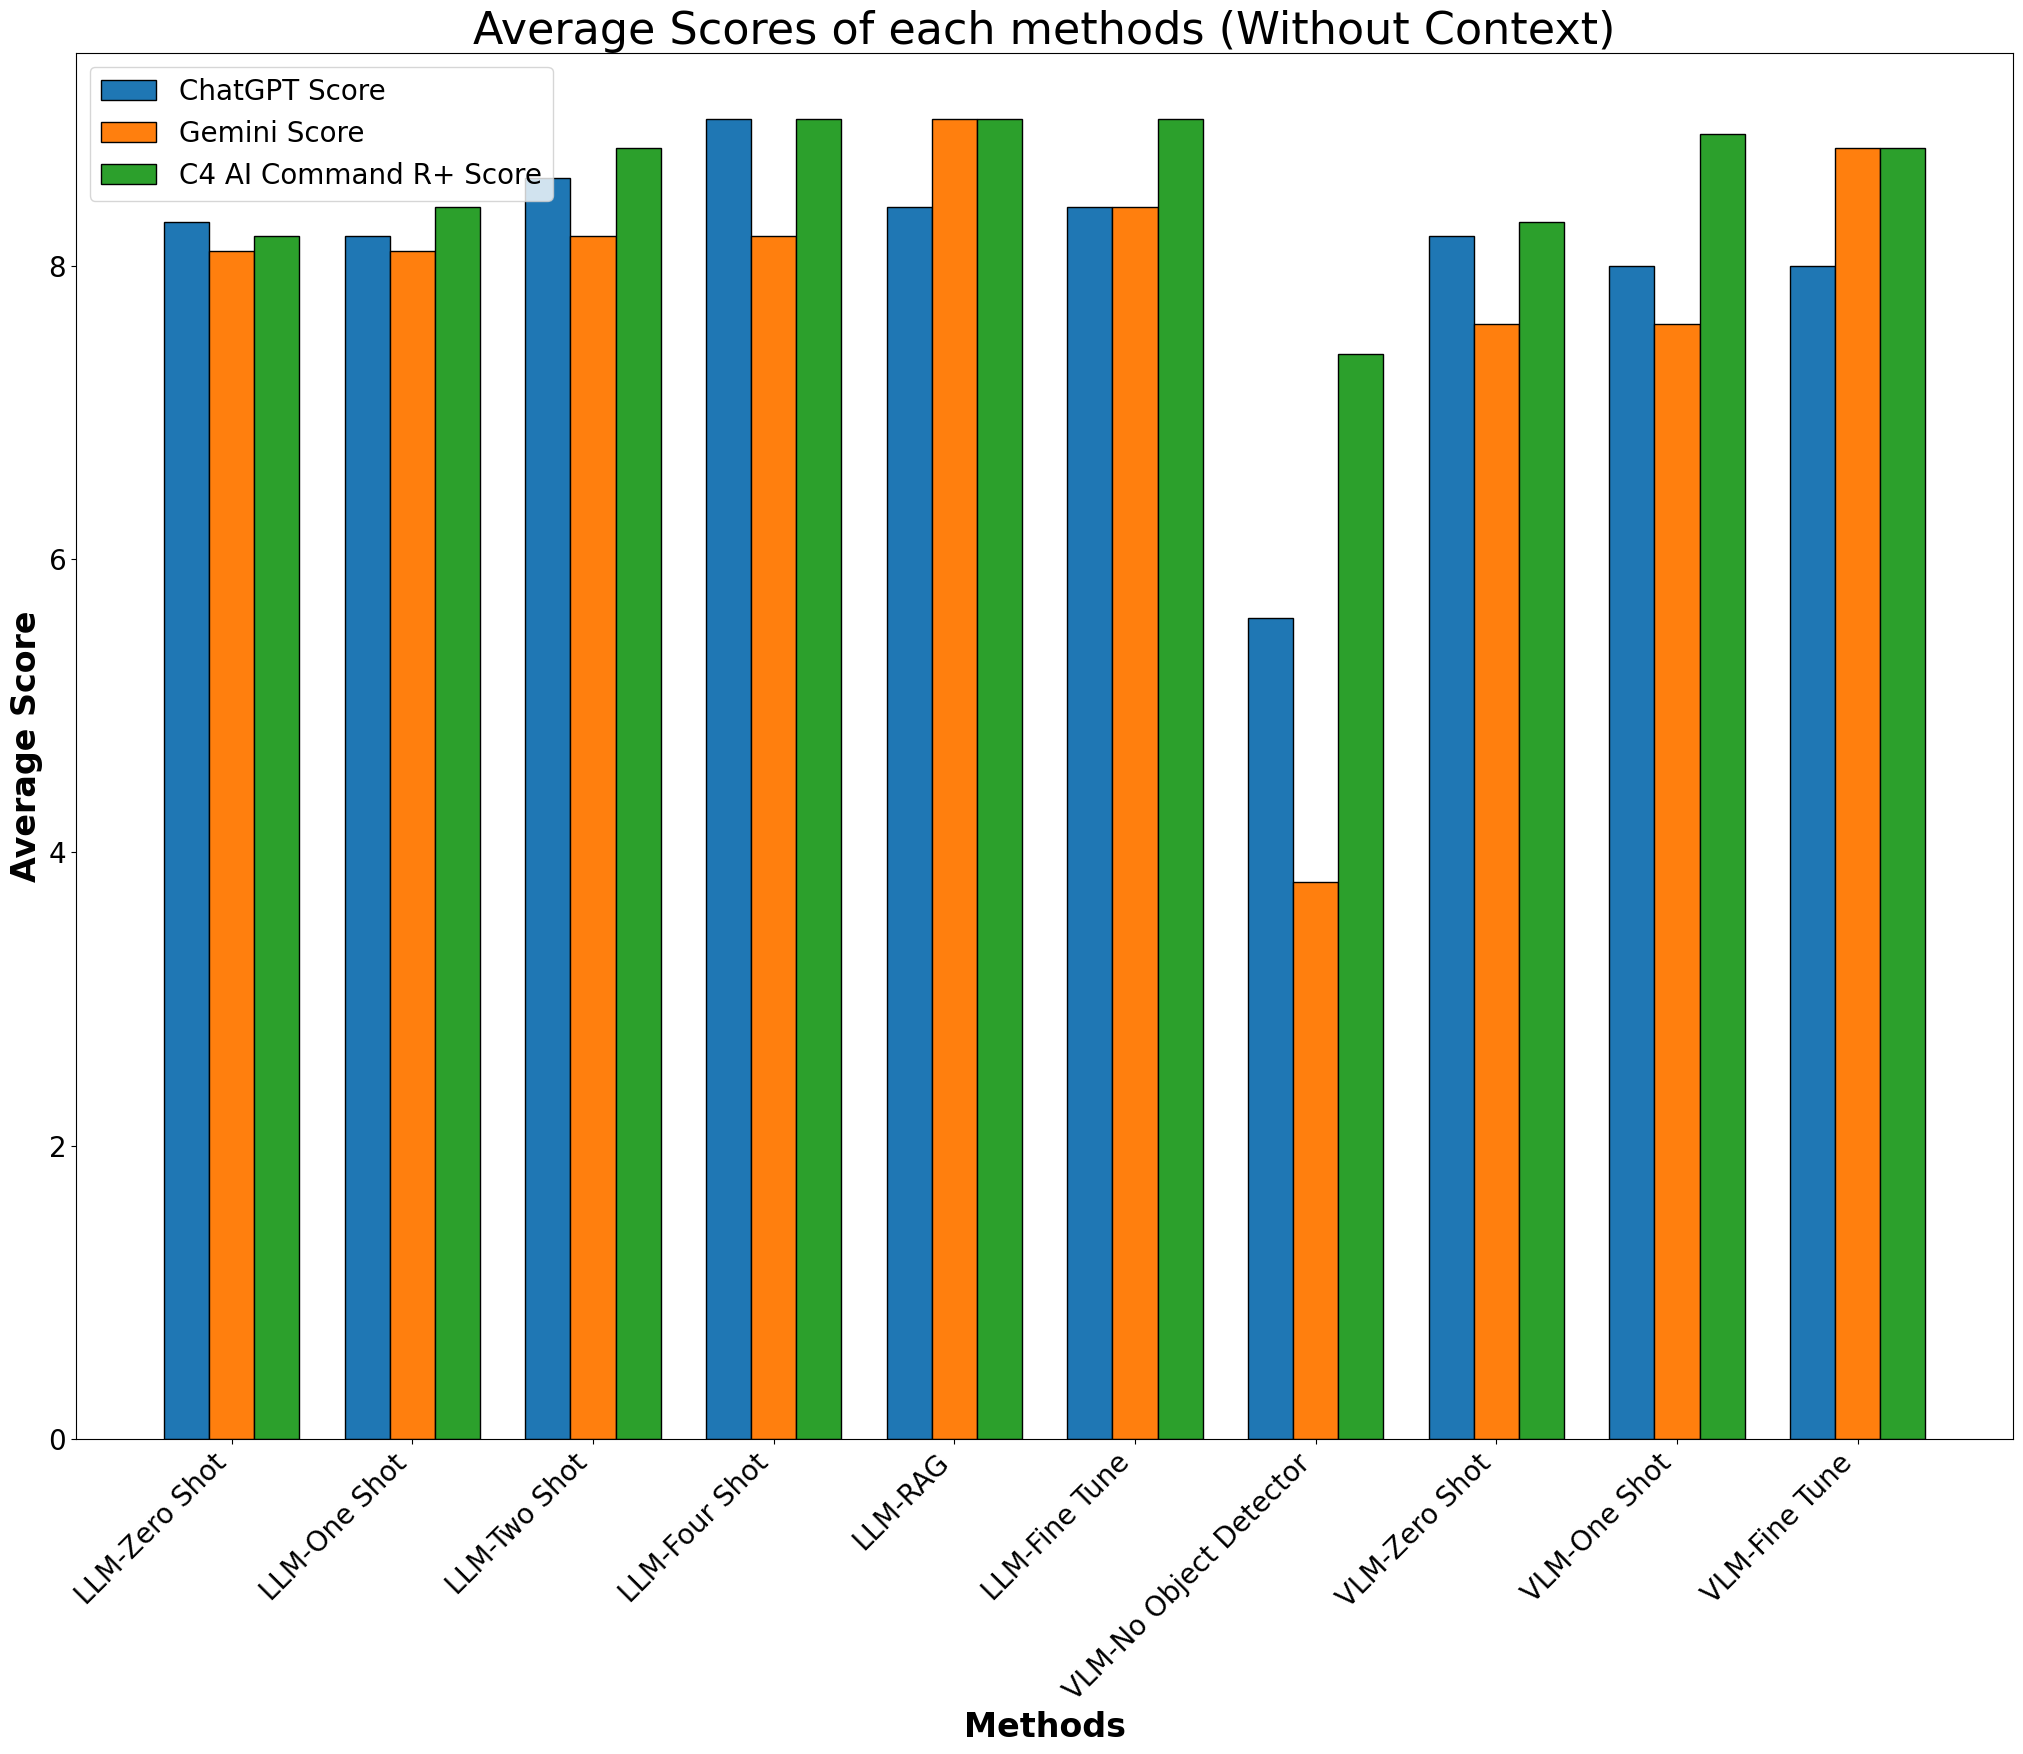

In [27]:
bar_width = 0.25

r1 = np.arange(len(methods_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(25, 18))

plt.bar(r1, gpt, color=colors[0], width=bar_width, edgecolor='black', label='ChatGPT Score')
plt.bar(r2, gemini, color=colors[1], width=bar_width, edgecolor='black', label='Gemini Score')
plt.bar(r3, c4, color=colors[2], width=bar_width, edgecolor='black', label='C4 AI Command R+ Score')

plt.xlabel('Methods', fontweight='bold', fontsize=24)
plt.ylabel('Average Score', fontweight='bold', fontsize=24)
plt.xticks([r + bar_width for r in range(len(methods_list))], methods_list, fontsize=20, rotation=45, ha='right')
plt.yticks(fontsize=20)
plt.title('Average Scores of each methods (Without Context)', fontsize=32)

plt.legend(fontsize=20)
plt.show()